In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.stats import probplot
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataf = sns.load_dataset('titanic')
dataf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df = dataf[['age', 'fare', 'survived']]
df

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [4]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [5]:
df['age'] = df['age'].fillna(df['age'].mean())

/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_6712/3356947290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].mean())


In [6]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [7]:
X = df.iloc[:, :2]
y = df['survived']

In [8]:
X

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_6712/1209920828.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'], ax = axes[1])


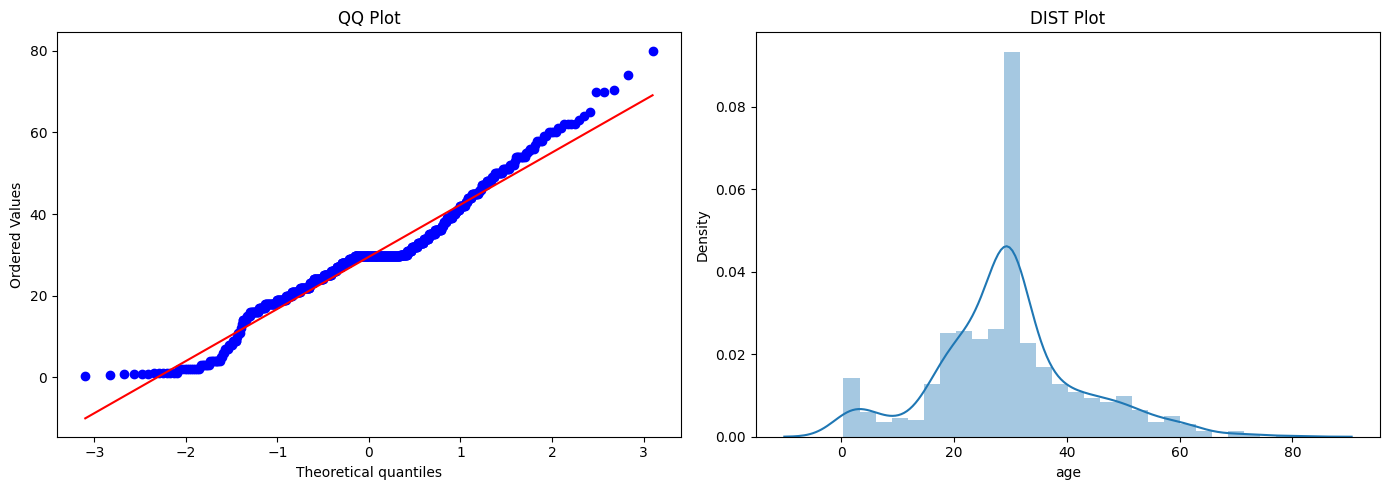

In [11]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

probplot(X_train['age'], dist = 'norm', plot = axes[0])
axes[0].set_title("QQ Plot")

sns.distplot(X_train['age'], ax = axes[1])
axes[1].set_title("DIST Plot")


plt.tight_layout()
plt.show()

/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_6712/3817865875.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'], ax = axes[1])


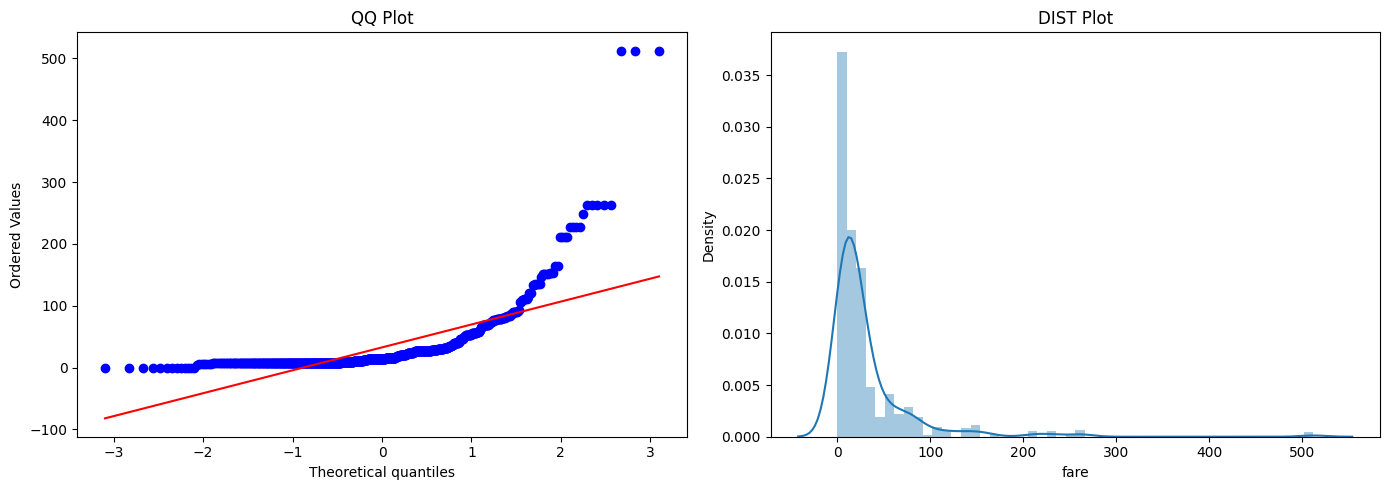

In [12]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

probplot(X_train['fare'], dist = 'norm', plot = axes[0])
axes[0].set_title("QQ Plot")

sns.distplot(X_train['fare'], ax = axes[1])
axes[1].set_title("DIST Plot")


plt.tight_layout()
plt.show()

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f'Accuracy Score for LR: {accuracy_score(y_pred, y_test)}')
print(f'Accuracy Score for DT: {accuracy_score(y_pred2, y_test)}')

Accuracy Score for LR: 0.6480446927374302
Accuracy Score for DT: 0.6815642458100558


In [15]:
trf = FunctionTransformer(func= np.log1p)

In [16]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [17]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

In [27]:
clf3.fit(X_train_transformed, y_train)
clf4.fit(X_train_transformed, y_train)

y_pred = clf3.predict(X_test_transformed)
y_pred2 = clf4.predict(X_test_transformed)

print(f'Accuracy Score for LR: {accuracy_score(y_pred, y_test)}')
print(f'Accuracy Score for DT: {accuracy_score(y_pred2, y_test)}')

Accuracy Score for LR: 0.6815642458100558
Accuracy Score for DT: 0.6983240223463687


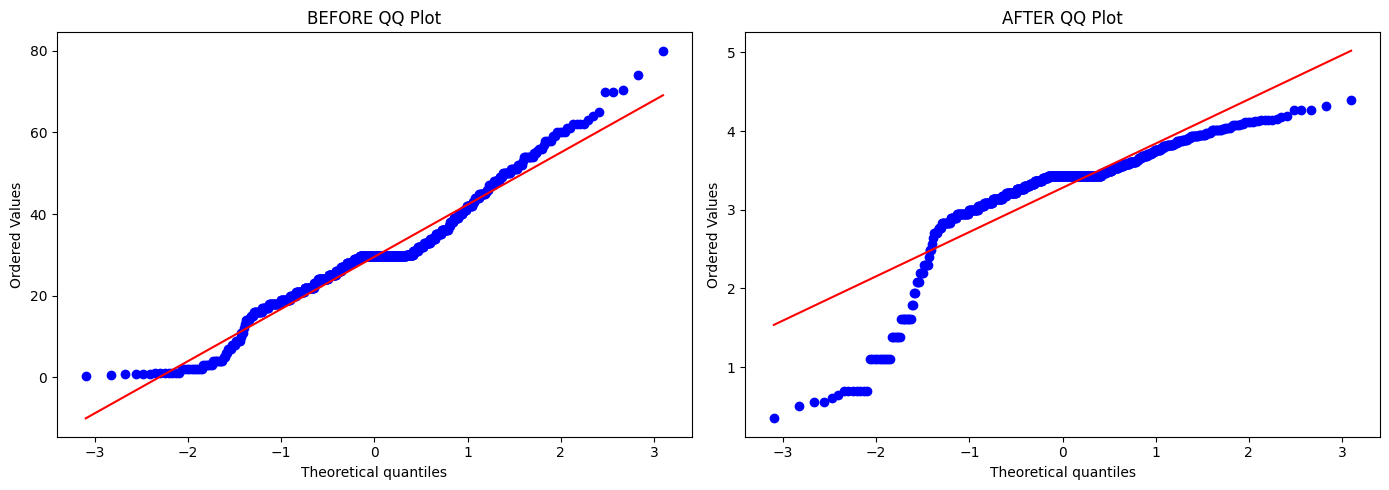

In [30]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

probplot(X_train['age'], dist = 'norm', plot = axes[0])
axes[0].set_title("BEFORE QQ Plot")

probplot(X_train_transformed['age'], dist = 'norm', plot = axes[1])
axes[1].set_title("AFTER QQ Plot")


plt.tight_layout()
plt.show()

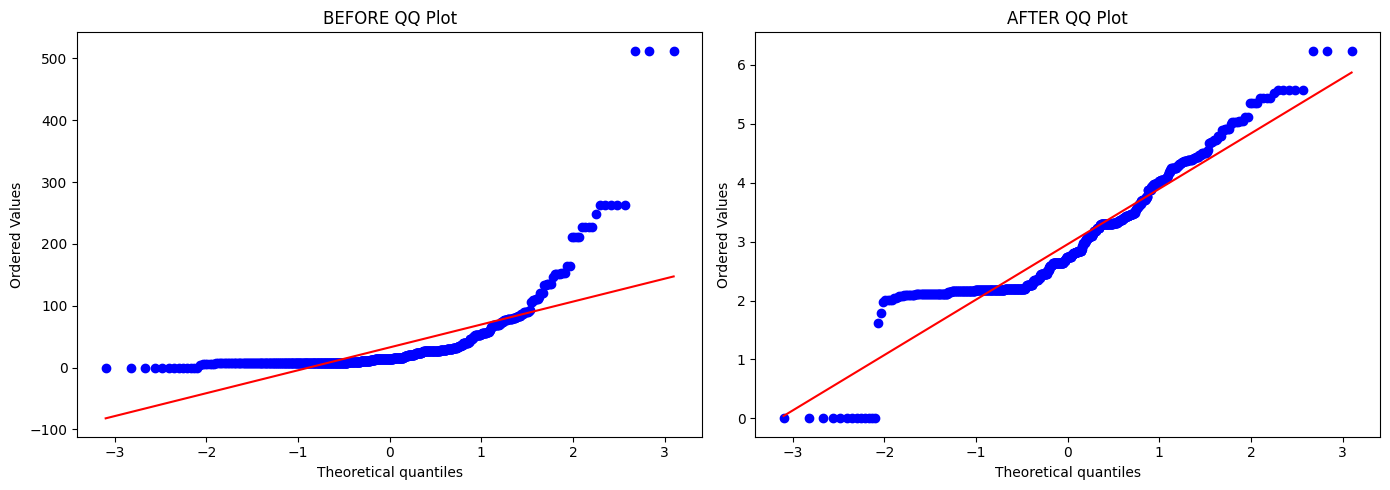

In [31]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

probplot(X_train['fare'], dist = 'norm', plot = axes[0])
axes[0].set_title("BEFORE QQ Plot")

probplot(X_train_transformed['fare'], dist = 'norm', plot = axes[1])
axes[1].set_title("AFTER QQ Plot")


plt.tight_layout()
plt.show()

it shows that age is more deteriorated after transformations. so we can leave age as it is and apply transformations only to fare columns

now we can apply transformations to fare column only

In [32]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['fare'])], remainder='passthrough' )

In [36]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f'Accuracy Score for LR: {accuracy_score(y_pred, y_test)}')
print(f'Accuracy Score for DT: {accuracy_score(y_pred2, y_test)}')